In [1]:
#import sys
#!{sys.executable} -m pip install -r requirements.txt
#!{sys.executable} -m pip install importlib
#import time
#import matplotlib.pyplot as plt
#from inverse_thomson_scattering.v0 import form_factor as np_ff
#from inverse_thomson_scattering.jax import form_factor as jnp_ff
#from inverse_thomson_scattering.utils import plotting
import numpy as np
from scipy import special as sp
from importlib import reload

In [2]:
x = np.array(np.arange(-8, 8, 0.1))

# distf = 1 / (2 * np.pi) ** (1 / 2) * np.exp(-(x**5) / 2)
m = 2
const = np.sqrt(3*sp.gamma(3./m)/sp.gamma(5./m))
distf = np.exp(-(np.abs(x/const)**m))

norm = np.trapz(distf) * (x[2]-x[1])
distf = distf/norm

sa = np.linspace(55, 65, 10)

In [3]:
from inverse_thomson_scattering.v0 import ThomsonInputs
TSnull=ThomsonInputs.ThomsonInputs(526.5,.2,.5,2,1,1,1,'DLM')
TSnull.ne['Active']=1
TSnull.Te['Active']=1
TSnull.disp()
#print(TSnull.Te['Active'])
#print(TSnull.__dict__)
#setattr(TSnull,'Te',{'Active':1})
#print(TSnull.__dict__)
#print(TSnull.Te['Active'])
#print(vars(TSnull))

Te :  0.5
ne :  0.2


/home/avi/private/inverse-thomson-scattering/inverse_thomson_scattering/v0/ratintn.py:42: ComplexWarning: Casting complex values to real discards the imaginary part
  out[:, ~iflat] = rfn[:, ~iflat]


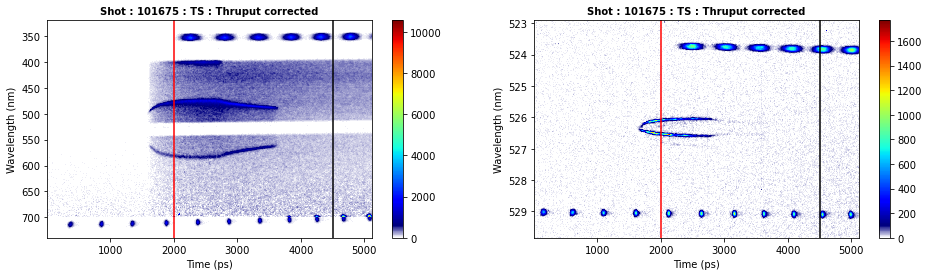

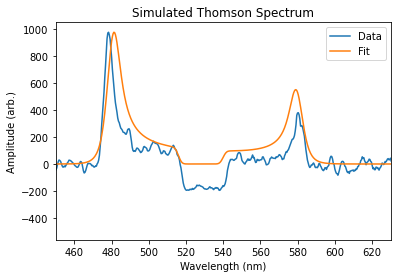

In [4]:
from inverse_thomson_scattering.v0 import datafitter
datafitter=reload(datafitter)
bgshot={'type': [], 'val': []}
lnout={'type': 'ps', 'val': 2000}
bglnout={'type': 'pixel', 'val': 900}
extraoptions={'spectype': 2}
datafitter.dattafitter(101675,bgshot,lnout,bglnout,1,2,TSnull,extraoptions)

In [5]:
test= dict([])
test['type']='shot'
test['val']=123
test2= dict([])
test['test2']=test2
print(test['test'+str(2)])
print(test['test2'])


{}
{}


In [6]:
print(test['test2'])
test2['type']='shot'
print(test['test2'])

{}
{'type': 'shot'}


In [7]:
def test3(*args):
    print(args[2])
test3(1,2,3)

3


In [8]:
a=np.array([1,2,3,4])
b=np.array([[1],[2]])
b=np.append(b,b,axis=1)
print(a)
print(b)
c= a < 3
print(a[c])

[1 2 3 4]
[[1 1]
 [2 2]]
[1 2]


In [9]:
a=np.ones([2,5])
b=np.array([[-100],[-.5]])
print(a*b)
print(np.shape(a*b)[1])
print(type(a)=='np.ndarray')
print(isinstance(a,np.ndarray))

[[-100.  -100.  -100.  -100.  -100. ]
 [  -0.5   -0.5   -0.5   -0.5   -0.5]]
5
False
True


In [10]:
a=tuple([1,(3999,)])
print(a[1:])

((3999,),)


In [11]:
if [1, 2]: print('True')

True


In [12]:
a=np.arange(2048)
a=a.reshape(-1,1024)
print(a)
print(np.shape(a[0,:]))
b=np.average(a, axis=1)
print(b)

[[   0    1    2 ... 1021 1022 1023]
 [1024 1025 1026 ... 2045 2046 2047]]
(1024,)
[ 511.5 1535.5]


In [13]:
a=[]
np.shape(a)
if np.shape(a)[0]==0: print('empty')

empty
